In [1]:
%matplotlib  inline

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq
import seaborn as sns

In [3]:
data1= pd.read_parquet('formatparquet.parquet')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Stage           2236 non-null   category      
 1   Date            2236 non-null   datetime64[ns]
 2   Distance        2236 non-null   float64       
 3   Origin          2236 non-null   object        
 4   Destination     2236 non-null   object        
 5   Type            2236 non-null   category      
 6   Winner          2236 non-null   object        
 7   Winner_Country  2184 non-null   object        
 8   annee           2236 non-null   int64         
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 130.1+ KB


In [4]:
comp = data1.groupby('annee')

In [5]:
d = {'distance':comp['Distance'].mean() ,'etapes' :comp['Stage'].count()  }
print(d.keys())
synth= pd.DataFrame(d )
synth.head()

dict_keys(['distance', 'etapes'])


,distance,etapes
annee,,
1903,404.666667,6
1904,404.833333,6
1905,274.636364,11
1906,349.461538,13
1907,320.571429,14


In [6]:
synth.reset_index(inplace =True)
synth.head()

,annee,distance,etapes
0,1903,404.666667,6
1,1904,404.833333,6
2,1905,274.636364,11
3,1906,349.461538,13
4,1907,320.571429,14


C:\Users\33681\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\33681\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\33681\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


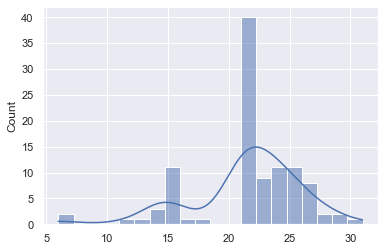

In [36]:
dt = synth['etapes'].to_numpy()
sns.set_theme()
sns.histplot(synth['etapes'].to_numpy(), kde=True)

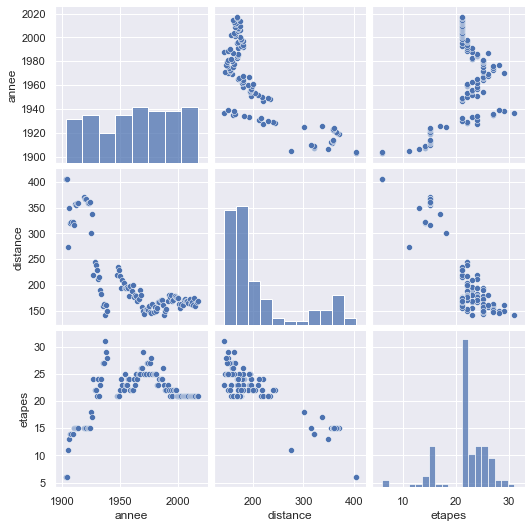

In [59]:
sns.pairplot(synth)

